# Plot model fit comparisons for simulation analysis 4

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from mindstorm import statplot
from dcmr import framework
from dcmr import figures
from dcmr import reports

fit_dir = Path(os.environ['CDCFR_FITS'])
fig_dir = Path(os.environ['CDCFR_FIGURES']) / 'plots'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()
%matplotlib inline

In [2]:
_, stat = framework.comp_version_variants(fit_dir / 'switchboard')
stat

model
cmrsit_sem-context_cue-focused_dis-loc-cat_sub-block        -23.260013
cmrsit_sem-context_cue-focused_dis-loc_sub-list-block       -23.248813
cmrsit_sem-context_cue-focused_dis-cat_sub-block            -23.240637
cmrsit_sem-context_cue-focused_dis-loc_sub-block            -23.238011
cmrsit_sem-context_cue-focused_dis-cat_sub-list-block       -23.218748
cmrsit_sem-item_sub-block                                   -23.218108
cmrsit_sem-context_cue-focused_sub-list-block               -23.212266
cmrsit_sem-context_cue-focused_dis-loc-cat_sub-list-block   -23.211416
cmrsit_sem-split_cue-focused_dis-loc-cat_sub-block          -23.206620
cmrsit_sem-context_cue-focused_sub-block                    -23.203566
cmrsit_sem-context_cue-focused_dis-loc-cat_sub-list         -23.192634
cmrsit_sem-context_cue-focused_dis-loc-cat                  -23.190360
cmrsit_sem-split_cue-focused_sub-list-block                 -23.187292
cmrsit_sem-context_cue-focused_dis-loc_sub-list             -23.186491


In [3]:
res = framework.read_model_switchboard(fit_dir / 'switchboard')

In [4]:
relabeled = res["dis"].replace({"cat": "C", "loc": "I", "loc-cat": "IC"})
res["dis"] = pd.Categorical(relabeled, categories=["none", "I", "C", "IC"], ordered=True)
res["sem"] = res["sem"].replace(
    {
        "context": "Semantic-context", 
        "item": "Semantic-item",
        "split": "Semantic-split",
    }
)

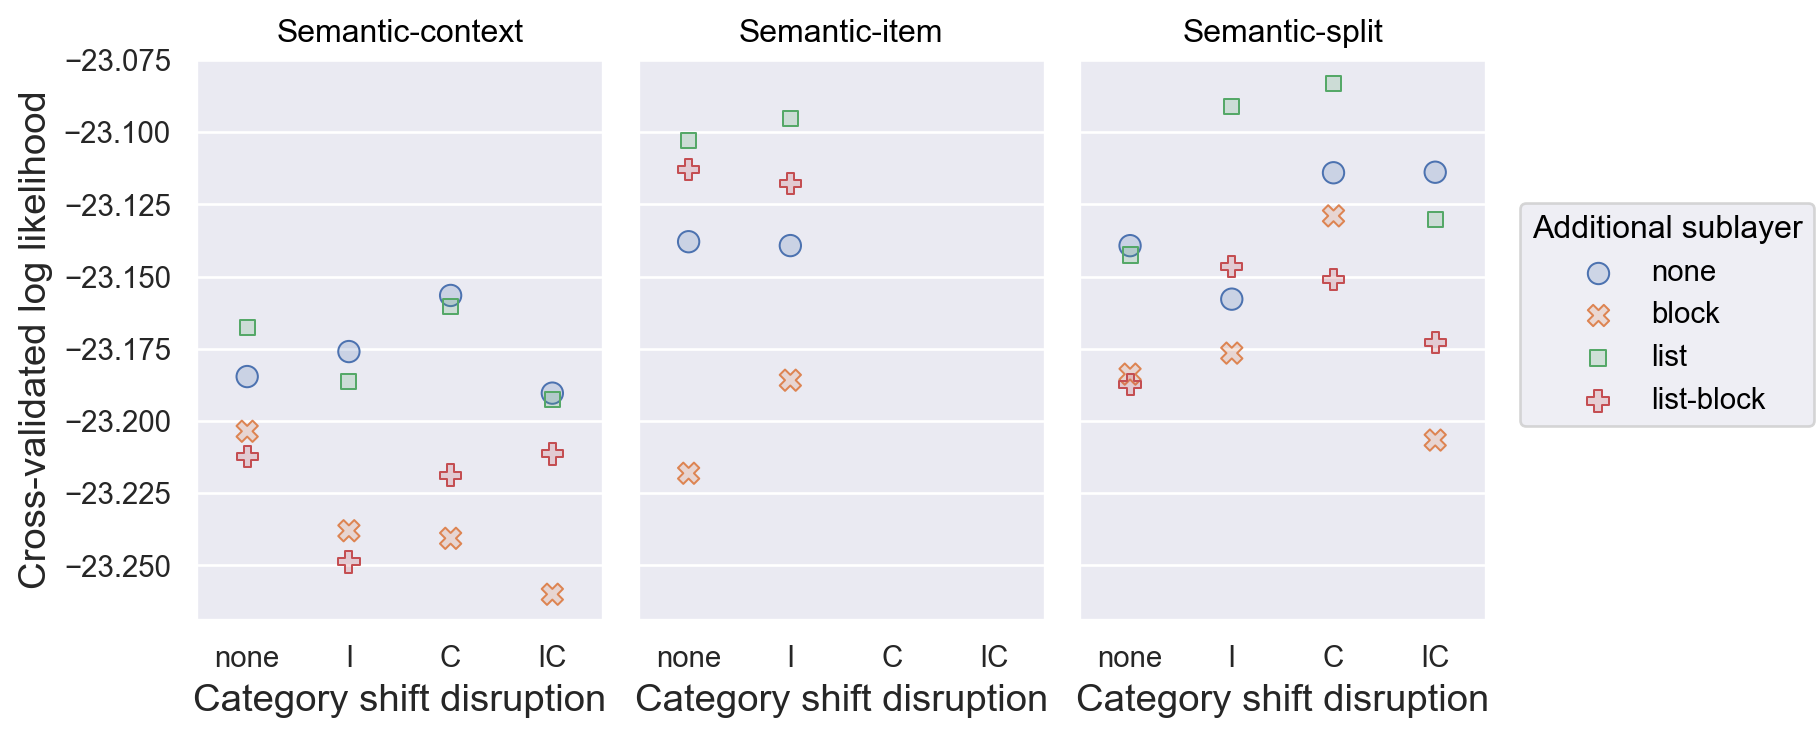

In [5]:
(
    so.Plot(res, y='logl', x='dis', color='sub', marker='sub')
    .facet('sem')
    .add(so.Dots(pointsize=8))
    .layout(size=(8, 4))
    .label(
        y='Cross-validated log likelihood', 
        x='Category shift disruption', 
        color='Additional sublayer',
    )
    .theme({'axes.labelsize': 'large'})
    .save(fig_dir / 'model_switchboard_comp.pdf', bbox_inches='tight')
)

## Load model fits

In [6]:
model_names = ['DCMR-Disrupt', 'CMR-MP16-L-Disrupt']
models = ['cmrsit_sem-split_cue-focused_dis-cat_sub-list', 'cmrsit_sem-item_dis-loc_sub-list']

## Create parameter tables

In [7]:
table, orig = reports.create_model_table(
    fit_dir / 'switchboard', models, model_names, model_comp='xval'
)
table.to_latex(fig_dir / 'parameters_cdcatfr2.tex', escape=False)
table

,DCMR-Disrupt,CMR-MP16-L-Disrupt
$\phi_s$,0.01 (0.00),0.01 (0.00)
$\phi_d$,2.08 (0.32),2.25 (0.33)
$\beta_{\mathrm{enc}}$,---,0.51 (0.02)
"$\beta_{\mathrm{enc},I}$",0.52 (0.02),---
"$\beta_{\mathrm{enc},C}$",0.24 (0.05),---
"$\beta_{\mathrm{enc},D}$",0.55 (0.07),---
$\beta_{\mathrm{start}}$,0.71 (0.06),0.79 (0.07)
$\beta_{\mathrm{rec}}$,---,0.83 (0.01)
"$\beta_{\mathrm{rec},I}$",0.77 (0.02),---
$w_1$,0.95 (0.02),---


In [8]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.13.6
IPython version      : 9.9.0

dcmr      : 1.0.0a0
matplotlib: 3.10.8
mindstorm : 0.11.2
numpy     : 2.4.1
pandas    : 3.0.0
seaborn   : 0.13.2

